In [136]:
%matplotlib inline
import json
import numpy as np
import os.path as path
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from salicon.salicon import SALICON

In [133]:
class FakeSalPredictor:
    
    def __init__(self,annFile,imageDir):
        """
        Construcor of Fake Saliency Preditor. 
        just produced half white half black image 
        """
        self.salicon = SALICON(annFile)
        self.imageDir = imageDir
        self.result = {}
        self.images = self.salicon.imgs
        
    def predict(self,imgFile,size):
        height,width = size
        first=np.ones((int(height/2),width))
        #second=np.zeros((width,(height - int(height/2))))
        second = np.empty(((height - int(height/2),width)))
        second.fill(0.5)
        out=np.concatenate((first,second),axis=0)
        return out
        #print imgFile
        #print out.shape
        
    def predictAll(self):
        for id,img in self.images.items():
            imgFile = path.join(self.imageDir,img['file_name'])
            self.result[id] = self.predict(imgFile,(img['height'],img['width']))
      
    def dumpRslt(self,outfile):
        anns = [{u'image_id':image_id,'saliency_map':res.tolist()} for image_id,res in self.result.items()]
        with open(outfile, 'w') as fp:
            json.dump(anns, fp)
    def getImageIds(self):
        return self.images.keys()
    
    def showPrediction(self,image_id):
        prediction = self.result[image_id]
        plt.imshow(prediction,cm.Greys_r,vmin = 0, vmax = 1)
        pass

loading annotations into memory...
0:00:00.336345
creating index...
index created!
[102625, 101189, 109441, 106920, 108425, 104589, 105711, 106392, 100083, 102904]


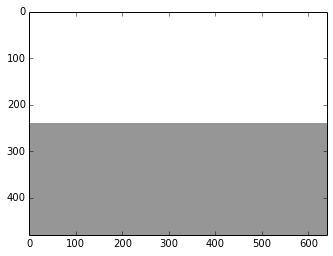

In [137]:
if __name__ == "__main__":
    sp = FakeSalPredictor('./annotations/fixations_val2014_examples.json','./images/examples')
    sp.predictAll()
    print sp.getImageIds()
    sp.showPrediction(102625)
    sp.dumpRslt('./results/salmaps_val2014_fake_results.json')